# 1: Problem Definition

Delhivery, the largest and fastest growing fully integrated player in India wants to understand and process the data coming out of data engineering pipelines. They would like data analysts to:

-- Clean, sanitize and manipulate data to get useful features out of raw fields

-- Make sense out of the raw data and help the data science team to build forecasting models on it

In [100]:
#Import important Python libraries to be used during the analysis of Delhivery dataset

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, kruskal, levene, shapiro
from statsmodels.graphics.gofplots import qqplot

# 2: Exploratory Data Analysis

In [119]:
#Read the dataset from local library

df=pd.read_csv('C:/Users/samaksharma/Downloads/Scaler_DS/11_Maths for ML/Project_Delhivery/delhivery_data.csv')

In [120]:
# Glimpse of how the data looks like

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [121]:
# Shape of dataset

a=df.ndim
b=df.shape
print(f'This is a {a} dimensional dataset.')
print(f'There are {b[0]} rows and {b[1]} columns in this dataset.')

This is a 2 dimensional dataset.
There are 144867 rows and 24 columns in this dataset.


In [122]:
# Extract datatypes for all fields in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Datetime fields in the dataset like trip_Creation_time, odStart_time, od_end_time, cutoff_timestamp are of the object datatype.
These can be changed to datetime datatype so that extracting month,year,date or time can be easy afterwards.

In [123]:
# Converting the datatype of date/ time fields to datetime format

df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'])

In [124]:
# Verify if the datatype of above fields is modified to datetime

df[['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  144867 non-null  datetime64[ns]
 1   od_start_time       144867 non-null  datetime64[ns]
 2   od_end_time         144867 non-null  datetime64[ns]
 3   cutoff_timestamp    144867 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.4 MB


# Identifying and Handling Missing values

In [107]:
# Handle Missing Values

round(df.isna().sum()/len(df)*100,2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

We observe that there are 293 rows(0.2%) where source_name is missing and 261(0.18%) rows where destination_name is missing.
Since, these columns are of object datatype, we cannot replace them with mean, median or mode.
We can go ahead and replace them with 'Location Unknown'.

In [125]:
# Identify the source center codes for which we do not have source name

unq_nan_source_cd=df[df['source_name'].isnull()]['source_center'].unique()
unq_nan_source_cd

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [126]:
# Identify the source name for any of the 10 source center codes in the dataset

df[df['source_center'].isin(unq_nan_source_cd)]['source_name'].unique()

array([nan], dtype=object)

In [127]:
# Delete rows with NaN values and reverify for missing values

df.dropna(inplace=True)
round(df.isna().sum()/len(df)*100,2)

data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

Our assumption was that we will identify the source center id for those source names which are missing.
Then identify the source name for those source center id. Unfortunately, all those 10 source centers do not have source names. Same explanation is applicable where we destination name is missing.
Since, there are very few records, we can go ahead and delete those records from the dataset.

# Data Cleaning & Merge

In [128]:
# Delete columns from the dataset which have no significance and are unknown:

df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [131]:
# Some of the values in segment_actual_time have negative values. Since, time cannot be in negative we can convert them to positive

df['segment_actual_time']=df['segment_actual_time'].apply(lambda x: x+(2*abs(x)) if x < 0 else x)
df[df['segment_actual_time'] < 0]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


All negative values in segment actual time have been converted to positive

In [132]:
# Group by records based on trip uuid, source id and destination id and fetch the last record for this group

df_g1=df.groupby(['trip_uuid','source_center','destination_center']).last().reset_index()
df_g1.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,20.0,10.0,15.0693
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,22.0,3.0,5.3898
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,15.0,7.0,6.9464
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,20.0,3.0,3.8074
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,275.0,28.0,32.8506


In [133]:
# Group by records based on trip uuid, source id and destination id and fetch the sum of segment actual time,
# segment osrm time and segment osrm distance

df_g2=df.groupby(['trip_uuid','source_center','destination_center'])['segment_actual_time','segment_osrm_time','segment_osrm_distance'].sum().reset_index()
df_g2.head()

C:\Users\samaksharma\AppData\Local\Temp\ipykernel_27428\3527585650.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g2=df.groupby(['trip_uuid','source_center','destination_center'])['segment_actual_time','segment_osrm_time','segment_osrm_distance'].sum().reset_index()


,trip_uuid,source_center,destination_center,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,608.0,231.0,317.7408


In [134]:
# Perform inner join on both the intermediate datasets to merge the records

df_merge=df_g1.merge(df_g2,on=['trip_uuid','source_center','destination_center'])
df_merge.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,segment_actual_time_y,segment_osrm_time_y,segment_osrm_distance_y
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,383.759164,732.0,329.0,446.5496,20.0,10.0,15.0693,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,440.973689,830.0,388.0,544.8027,22.0,3.0,5.3898,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,24.644021,47.0,26.0,28.1994,15.0,7.0,6.9464,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,48.542890,96.0,42.0,56.9116,20.0,3.0,3.8074,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,237.439610,611.0,212.0,281.2109,275.0,28.0,32.8506,608.0,231.0,317.7408


In [135]:
# Drop duplicate columns which are created after merging
        
df_merge.drop(columns=['segment_actual_time_x','segment_osrm_time_x','segment_osrm_distance_x'],inplace=True)

In [136]:
# Rename columns which are merged from another dataset having suffix _y

df_merge.rename(columns={'segment_actual_time_y':'segment_actual_time','segment_osrm_time_y':'segment_osrm_time','segment_osrm_distance_y':'segment_osrm_distance'},inplace=True)

df_merge is the final dataset which can be used for further processing.

# Feature Creation

In [137]:
# Create a new column for calculating difference in trip end time and start time

df_merge['diff_od_time']=round((df_merge['od_end_time']-df_merge['od_start_time']).dt.total_seconds()/60,0)

In [138]:
# Check the year for which we have dataset

df_merge['trip_creation_time'].dt.year.unique()

array([2018], dtype=int64)

We have records only from year 2018, so there is no need to create year olumn from trip creation date

In [139]:
# Create 2 new columns to separate month and date from trip creation time

df_merge['trip_mth']=df_merge['trip_creation_time'].dt.month
df_merge['trip_dt']=df_merge['trip_creation_time'].dt.day

In [140]:
# Check the months for which we have dataset

df_merge['trip_mth'].value_counts()

9     23054
10     3168
Name: trip_mth, dtype: int64

We observe that dataset has records for the month of September and October of 2018.

In [141]:
# Change numerical values of month to text

df_merge['trip_mth']=df_merge['trip_mth'].apply(lambda x:'Sep' if x == 9 else 'Oct')

In [422]:
# Create 2 new columns to calculate the difference between actual time & osrm time and actual distance & osrm distance

df_merge['diff_actual_osrm_time']=abs(df_merge['actual_time']-df_merge['osrm_time'])
df_merge['diff_actual_osrm_distance']=df_merge['osrm_distance']-df_merge['actual_distance_to_destination']

In [142]:
# Create 2 new columns from source name i.e. source city and source state

df_merge['source_city']=df_merge['source_name'].str.split('(').apply(lambda x:x[0])
df_merge['source_state']=(df_merge['source_name'].str.split('(').apply(lambda x:x[-1])).str.split(')').apply(lambda x:x[0])

In [144]:
# Create 2 new columns from destination name i.e. destination city and destination state

df_merge['dest_city']=df_merge['destination_name'].str.split('(').apply(lambda x:x[0])
df_merge['dest_state']=(df_merge['destination_name'].str.split('(').apply(lambda x:x[-1])).str.split(')').apply(lambda x:x[0])

In [145]:
# We can go ahead and delete the source name and destination name columns as now there is no significance

df_merge.drop(columns=['source_center','source_name','destination_center','destination_name','od_start_time','od_end_time'],inplace=True)

In [146]:
# Reshuffle the columns order so that it is easy for analysis

new_column_order=['data','trip_creation_time','trip_mth','trip_dt','route_schedule_uuid','route_type','trip_uuid','source_city','source_state','dest_city','dest_state','diff_od_time','start_scan_to_end_scan','actual_distance_to_destination','actual_time','segment_actual_time','osrm_time','segment_osrm_time','osrm_distance','segment_osrm_distance']
df_merge=df_merge[new_column_order]

In [423]:
df_merge.head()

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
0,training,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,...,1260.0,383.759164,732.0,728.0,329.0,534.0,446.5496,670.6205,403.0,62.790436
1,training,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H,Madhya Pradesh,Kanpur_Central_H_6,...,999.0,440.973689,830.0,820.0,388.0,474.0,544.8027,649.8528,442.0,103.829011
2,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,...,58.0,24.644021,47.0,46.0,26.0,26.0,28.1994,28.1995,21.0,3.555379
3,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,...,122.0,48.542890,96.0,95.0,42.0,39.0,56.9116,55.9899,54.0,8.368710
4,training,2018-09-12 00:00:33.691250,Sep,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,...,834.0,237.439610,611.0,608.0,212.0,231.0,281.2109,317.7408,399.0,43.771290


# Statistical Summary

In [148]:
df_merge.describe()

,trip_dt,diff_od_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance
count,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000
mean,18.400351,299.036572,298.536687,92.533054,200.926588,199.162688,90.785333,101.793341,114.975332,125.587130
std,7.892191,441.113701,441.112141,209.952355,385.730908,382.301777,185.554359,216.202739,254.426468,286.670106
min,1.000000,21.000000,20.000000,9.001351,9.000000,9.000000,6.000000,6.000000,9.072900,9.072900
25%,14.000000,91.000000,90.000000,21.654149,51.000000,50.000000,25.000000,25.000000,27.719150,28.429100
50%,19.000000,152.000000,152.000000,35.044329,84.000000,83.000000,39.000000,42.000000,43.543550,45.797650
75%,25.000000,307.000000,307.000000,65.557393,167.000000,166.000000,72.000000,79.000000,85.443950,91.023575
max,30.000000,7899.000000,7898.000000,1927.447705,4532.000000,4504.000000,1686.000000,1938.000000,2326.199100,2640.924700


- Mean difference of start time and end time is ~300 minutes. Though, the median is comparatively lower at 152 minutes.
There are clear outliers in this field as we see minimum time of 21 minutes to maximum time of 7899 minutes
- Mean actual distance from source to destination is 92 kms which is comparatively higher than the median of 35 kms.
There are clear outliers in this field as we see minimum distance of 9 kms to maximum distance of 1927 kms
- Actual time and segment actual time have almost similar values. Mean time taken for the route is 200 minutesifference in actual distance from source to destination is 92 kms which is comparatively higher than the median of 35 kms.
There are clear outliers in this field as we see minimum distance of 9 kms to maximum distance of 1927 kms

In [149]:
df_merge.describe(include=object)

,data,trip_mth,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,dest_state
count,26222,26222,26222,26222,26222,26222,26222,26222,26222
unique,2,2,1497,2,14787,1496,31,1466,32
top,training,Sep,thanos::sroute:f8c83fd0-6554-44f3-9408-32465bd...,FTL,trip-153717306559016761,Gurgaon_Bilaspur_HB,Maharashtra,Gurgaon_Bilaspur_HB,Karnataka
freq,18893,23054,111,13798,8,1052,3565,928,3497


- There are 2 kinds of data 'training' and 'test' of which most of the records are from 'training'
- Most of the trips are taken in the month of September as compared to October as we have data from 9th Sep to 3rd Oct
- There are 1497 unique orders delivered
- There are 2 kinds of route type i.e FTL and Carting. FTL trips are marginally more than Carting
- There are 14,787 segment trips as part of the complete delivery
- There are 1496 unique cities from which courier is picked up and 1466 cities where courier is delivered covering pan India

In [153]:
df_merge.describe(include='datetime')

C:\Users\samaksharma\AppData\Local\Temp\ipykernel_27428\3786296250.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_merge.describe(include='datetime')


,trip_creation_time
count,26222
unique,14787
top,2018-09-17 08:30:59.260046
freq,8
first,2018-09-12 00:00:16.535741
last,2018-10-03 23:59:42.701692


We have the data in dataset from September 12th,2018 to October 3rd, 2018

# Outlier Treatment

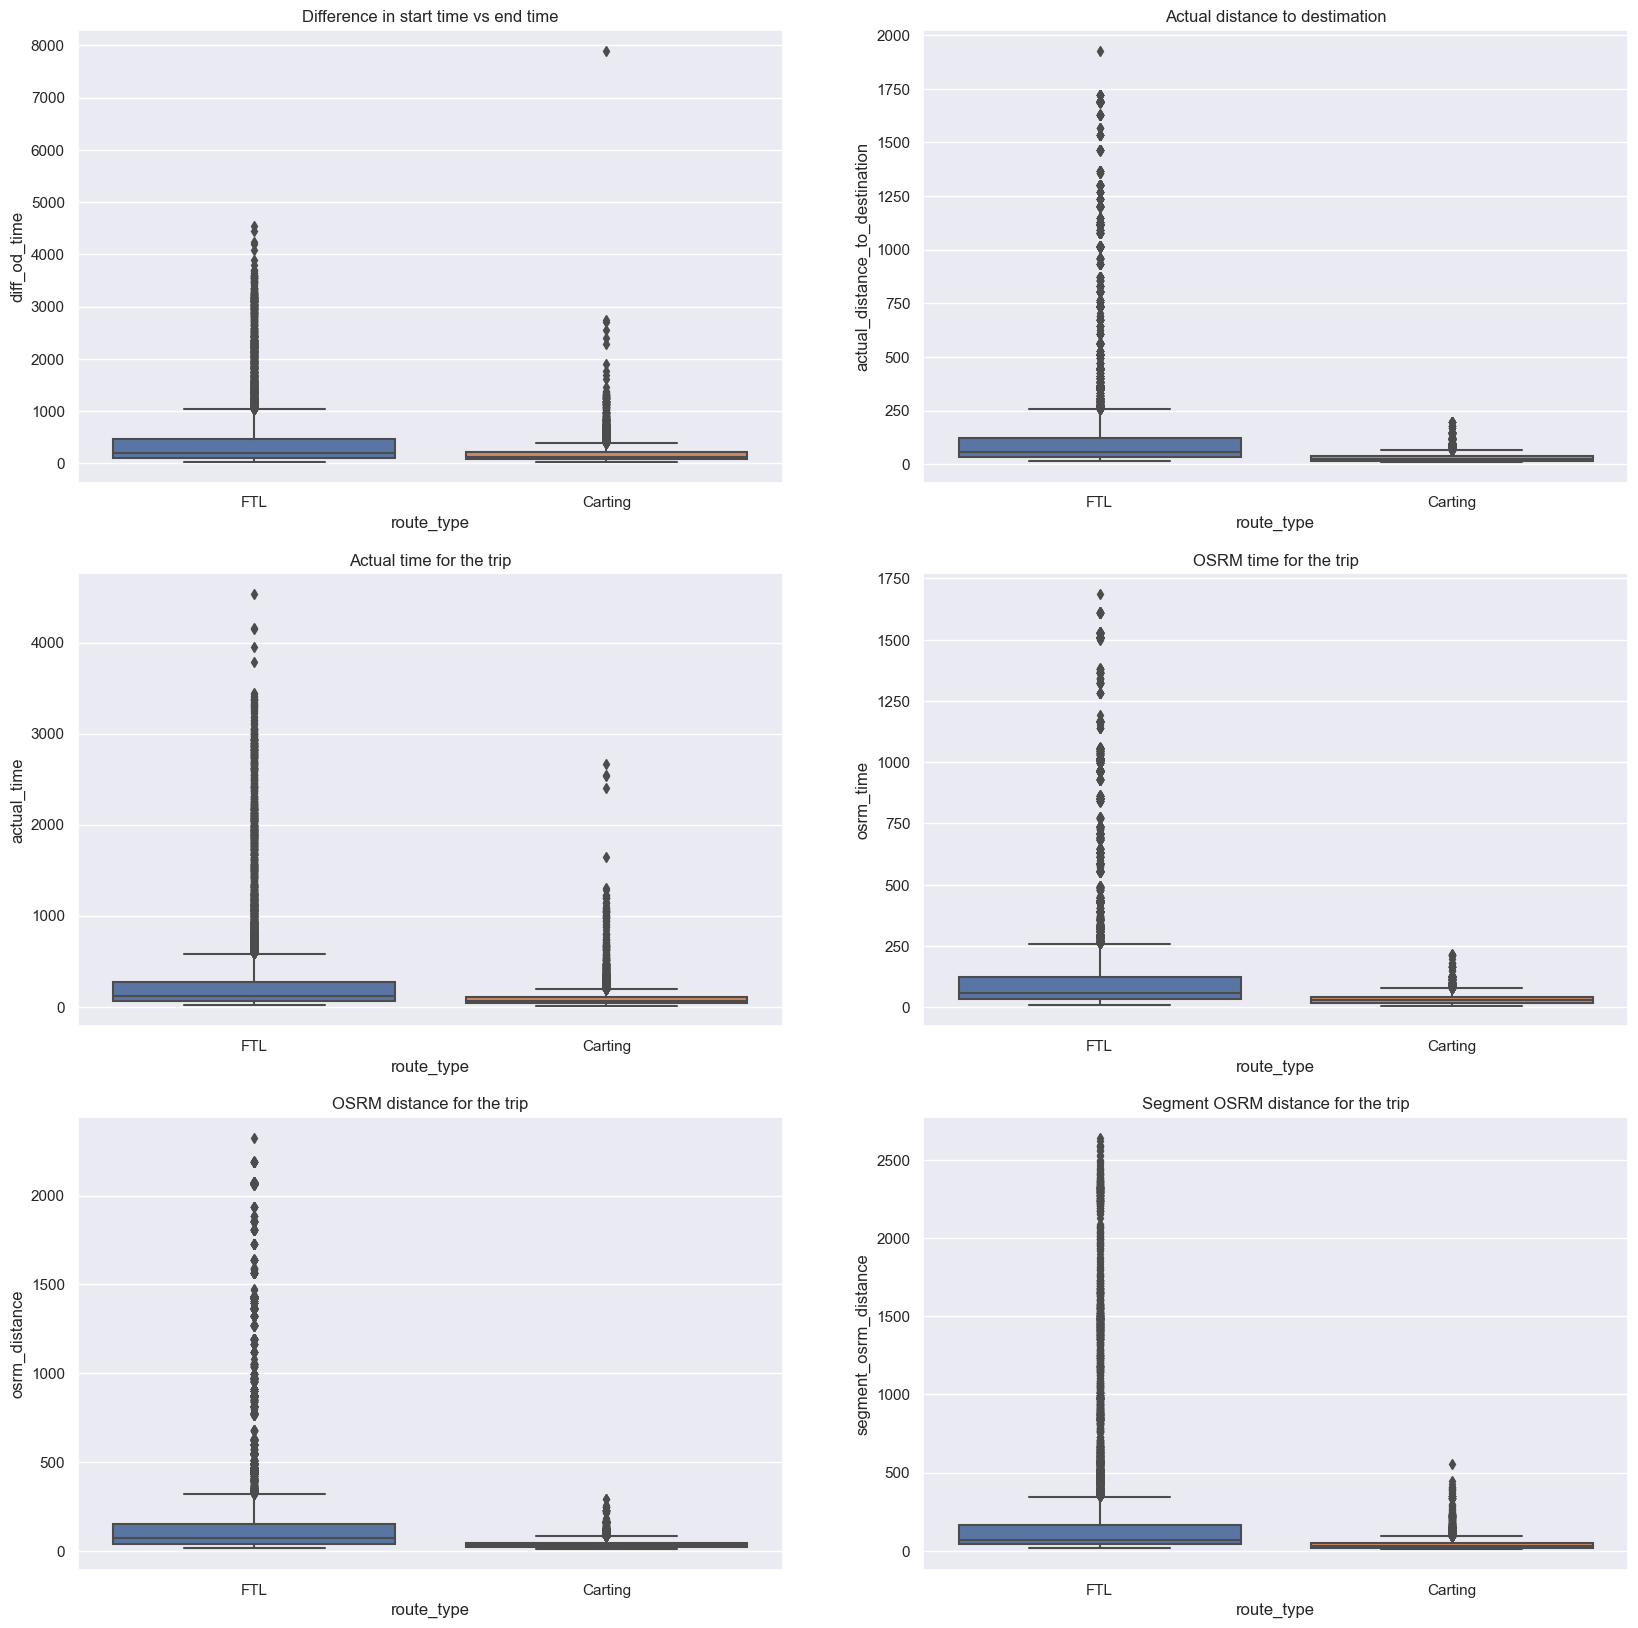

In [185]:
# Generate boxplot to check for outlers in time and distance fields

sns.set_theme()
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.title('Difference in start time vs end time')
sns.boxplot(y='diff_od_time',x='route_type',data=df_merge)

plt.subplot(3,2,2)
plt.title('Actual distance to destimation')
sns.boxplot(y='actual_distance_to_destination',x='route_type',data=df_merge)

plt.subplot(3,2,3)
plt.title('Actual time for the trip')
sns.boxplot(y='actual_time',x='route_type',data=df_merge)

plt.subplot(3,2,4)
plt.title('OSRM time for the trip')
sns.boxplot(y='osrm_time',x='route_type',data=df_merge)

plt.subplot(3,2,5)
plt.title('OSRM distance for the trip')
sns.boxplot(y='osrm_distance',x='route_type',data=df_merge)

plt.subplot(3,2,6)
plt.title('Segment OSRM distance for the trip')
sns.boxplot(y='segment_osrm_distance',x='route_type',data=df_merge)

plt.show()

 We observe that all the time and distance fields have lot of outliers. Lets try to calculate the number of outliers for each field

In [192]:
# diff_od_time and start_scan_to_end_scan have almost similar values. So we will naalyse the outliers in diff_od_time using IQR method

q1=df_merge['diff_od_time'].quantile(0.25)
q3=df_merge['diff_od_time'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for diff_od_time is {upper_bound}')
print(f'Lower limit for diff_od_time is {lower_bound}')
rec_cnt=len(df_merge[df_merge['diff_od_time']> upper_bound])
print(f'Number of outliers in diff_od_time: {rec_cnt}')

Upper limit for diff_od_time is 631.0
Lower limit for diff_od_time is -233.0
Number of outliers in diff_od_time: 2721


Since the number of outliers for diff_od_time is 2721 (10% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [195]:
# Outliers in actual_distance_to_destination will be analysed using IQR method

q1=df_merge['actual_distance_to_destination'].quantile(0.25)
q3=df_merge['actual_distance_to_destination'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for actual_distance_to_destination is {upper_bound}')
print(f'Lower limit for actual_distance_to_destination is {lower_bound}')
rec_cnt=len(df_merge[df_merge['actual_distance_to_destination']> upper_bound])
print(f'Number of outliers in actual_distance_to_destination: {rec_cnt}')

Upper limit for actual_distance_to_destination is 131.41225943752625
Lower limit for actual_distance_to_destination is -44.20071690937914
Number of outliers in actual_distance_to_destination: 3272


Since the number of outliers for actual_distance_to_destination is 3272 (12% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [196]:
# actual_time and segment_actual_time have almost similar values. So we will analyse the outliers in actual_time using IQR method

q1=df_merge['actual_time'].quantile(0.25)
q3=df_merge['actual_time'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for actual_time is {upper_bound}')
print(f'Lower limit for actual_time is {lower_bound}')
rec_cnt=len(df_merge[df_merge['actual_time']> upper_bound])
print(f'Number of outliers in actual_time: {rec_cnt}')

Upper limit for actual_time is 341.0
Lower limit for actual_time is -123.0
Number of outliers in actual_time: 3158


Since the number of outliers for actual_time is 3158 (12% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [200]:
# Outliers in osrm_time will be analysed using IQR method

q1=df_merge['osrm_time'].quantile(0.25)
q3=df_merge['osrm_time'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for osrm_time is {upper_bound}')
print(f'Lower limit for osrm_time is {lower_bound}')
rec_cnt=len(df_merge[df_merge['osrm_time']> upper_bound])
print(f'Number of outliers in osrm_time: {rec_cnt}')

Upper limit for osrm_time is 142.5
Lower limit for osrm_time is -45.5
Number of outliers in osrm_time: 2906


Since the number of outliers for osrm_time is 2906 (11% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [202]:
# Outliers in segment_osrm_time will be analysed using IQR method

q1=df_merge['segment_osrm_time'].quantile(0.25)
q3=df_merge['segment_osrm_time'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for segment_osrm_time is {upper_bound}')
print(f'Lower limit for segment_osrm_time is {lower_bound}')
rec_cnt=len(df_merge[df_merge['segment_osrm_time']> upper_bound])
print(f'Number of outliers in segment_osrm_time: {rec_cnt}')

Upper limit for segment_osrm_time is 160.0
Lower limit for segment_osrm_time is -56.0
Number of outliers in segment_osrm_time: 3138


Since the number of outliers for segment_osrm_time is 3138 (12% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [203]:
# Outliers in osrm_distance will be analysed using IQR method

q1=df_merge['osrm_distance'].quantile(0.25)
q3=df_merge['osrm_distance'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for osrm_distance is {upper_bound}')
print(f'Lower limit for osrm_distance is {lower_bound}')
rec_cnt=len(df_merge[df_merge['osrm_distance']> upper_bound])
print(f'Number of outliers in osrm_distance: {rec_cnt}')

Upper limit for osrm_distance is 172.03115
Lower limit for osrm_distance is -58.86805
Number of outliers in osrm_distance: 3079


Since the number of outliers for osrm_distance is 3079 (12% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

In [204]:
# Outliers in segment_osrm_distance will be analysed using IQR method

q1=df_merge['segment_osrm_distance'].quantile(0.25)
q3=df_merge['segment_osrm_distance'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(f'Upper limit for segment_osrm_distance is {upper_bound}')
print(f'Lower limit for segment_osrm_distance is {lower_bound}')
rec_cnt=len(df_merge[df_merge['segment_osrm_distance']> upper_bound])
print(f'Number of outliers in segment_osrm_distance: {rec_cnt}')

Upper limit for segment_osrm_distance is 184.91528749999998
Lower limit for segment_osrm_distance is -65.4626125
Number of outliers in segment_osrm_distance: 3095


Since the number of outliers for segment_osrm_distance is 3095 (12% of the total records) which is very high, it is not feasible to delete these values. Therefore, we will not treat these outliers.

- We have analysed the outliers for each of the fields and observed that around 10-12% of records are coming up as outliers.
- Some of the source and destination centers are far away as compared to others and that is why it will take more time and distance for the courier to be delivered and perhaps that is the reason for high count of outliers. 

# 3: Comparison and Visualization of time and distance fields

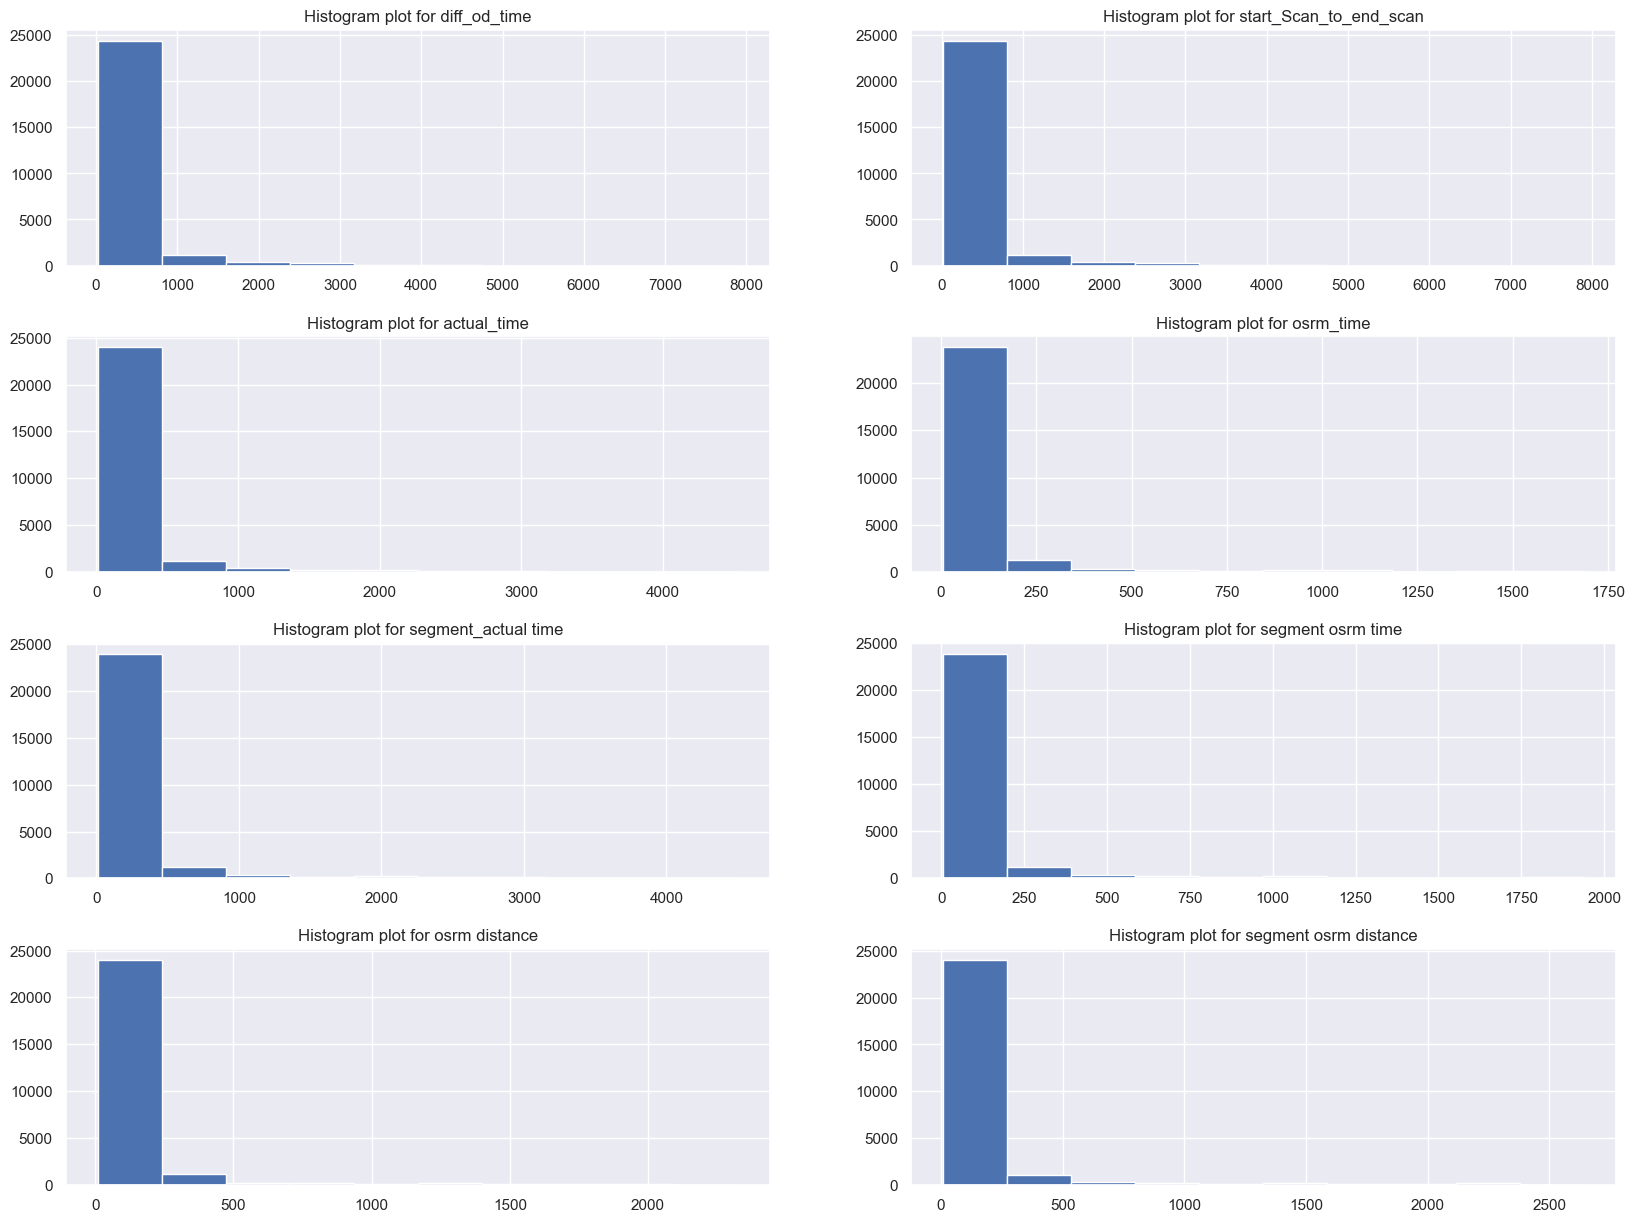

In [227]:
# Verify if the time and distance fields present in the dataset are Gaussian

plt.figure(figsize=(20,15))

plt.subplot(4,2,1)
plt.title('Histogram plot for diff_od_time')
plt.hist(df_merge['diff_od_time'])

plt.subplot(4,2,2)
plt.title('Histogram plot for start_Scan_to_end_scan')
plt.hist(df_merge['start_scan_to_end_scan'])

plt.subplot(4,2,3)
plt.title('Histogram plot for actual_time')
plt.hist(df_merge['actual_time'])

plt.subplot(4,2,4)
plt.title('Histogram plot for osrm_time')
plt.hist(df_merge['osrm_time'])

plt.subplot(4,2,5)
plt.title('Histogram plot for segment_actual time')
plt.hist(df_merge['segment_actual_time'])

plt.subplot(4,2,6)
plt.title('Histogram plot for segment osrm time')
plt.hist(df_merge['segment_osrm_time'])

plt.subplot(4,2,7)
plt.title('Histogram plot for osrm distance')
plt.hist(df_merge['osrm_distance'])

plt.subplot(4,2,8)
plt.title('Histogram plot for segment osrm distance')
plt.hist(df_merge['segment_osrm_distance'])

plt.subplots_adjust(hspace=0.3)
plt.show()


As observed from the above plots, none of the time and distance fields are in Gaussian

In [239]:
# We will use kruskal test to compare the difference of trip difference time with start scan to end time

stat,p_value=(kruskal(df_merge['diff_od_time'],df_merge['start_scan_to_end_scan']))
if p_value < 0.05:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is a difference between the mean values for trip time and start scan to end time')
else:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is no difference between the mean values for trip time and start scan to end time')

p-value for kruskal test is 0.58 and therefore, there is no difference between the mean values for trip time and start scan to end time


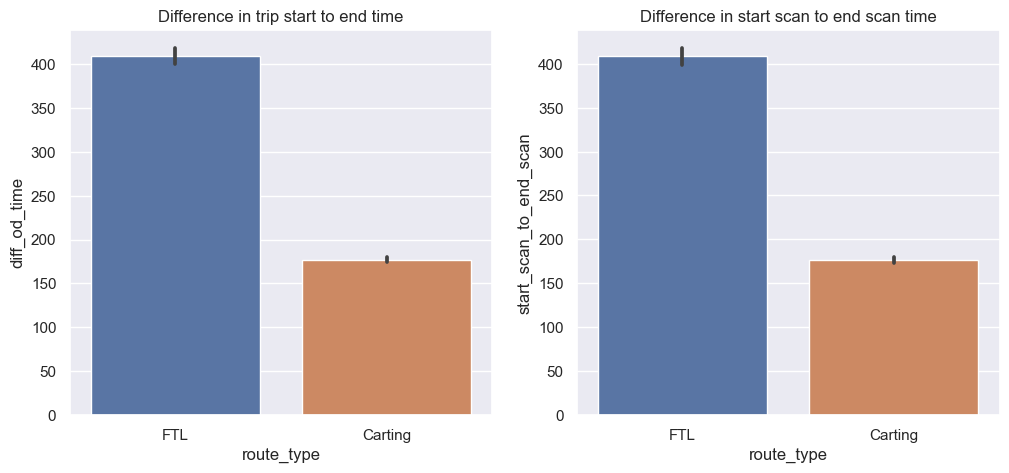

In [244]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Difference in trip start to end time')
sns.barplot(y='diff_od_time',x='route_type',data=df_merge)

plt.subplot(1,2,2)
plt.title('Difference in start scan to end scan time')
sns.barplot(y='start_scan_to_end_scan',x='route_type',data=df_merge)

plt.show()

We can confirm thru hypothesis testing and visual analysis that there is no difference in the mean values of diff_od_time and start_scan_to_end_time

In [246]:
# We will use kruskal test to compare the difference of actual time with osrm time

stat,p_value=(kruskal(df_merge['actual_time'],df_merge['osrm_time']))
if p_value < 0.05:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is a difference between the mean values for actual time and osrm time')
else:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is no difference between the mean values for actual time and osrm time')

p-value for kruskal test is 0.0 and therefore, there is a difference between the mean values for actual time and osrm time


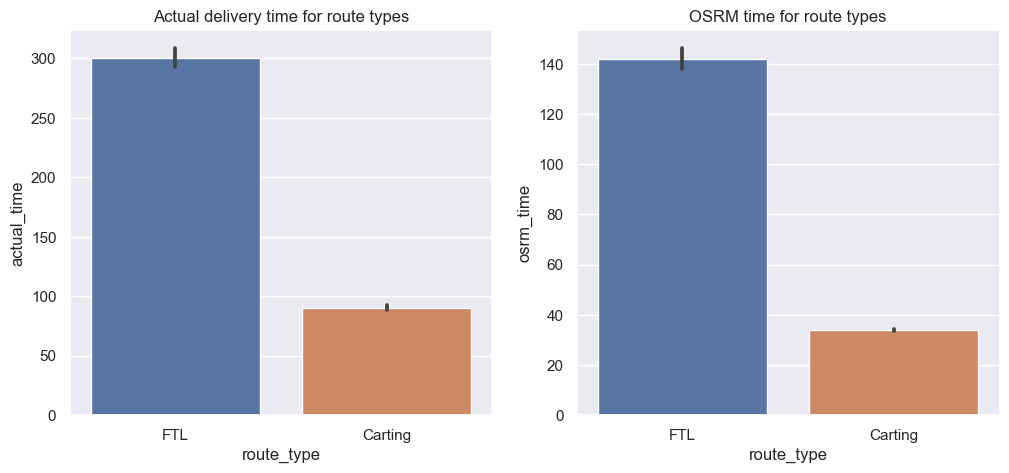

In [247]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Actual delivery time for route types')
sns.barplot(y='actual_time',x='route_type',data=df_merge)

plt.subplot(1,2,2)
plt.title('OSRM time for route types')
sns.barplot(y='osrm_time',x='route_type',data=df_merge)

plt.show()

We can confirm thru hypothesis testing and visual analysis that there is big difference in the mean values of actual time and osrm time

In [248]:
# We will use kruskal test to compare the difference of actual time with segment_actual_time

stat,p_value=(kruskal(df_merge['actual_time'],df_merge['segment_actual_time']))
if p_value < 0.05:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is a difference between the mean values for actual time and segment_actual_time')
else:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is no difference between the mean values for actual time and segment_actual_time')

p-value for kruskal test is 0.16 and therefore, there is no difference between the mean values for actual time and segment_actual_time


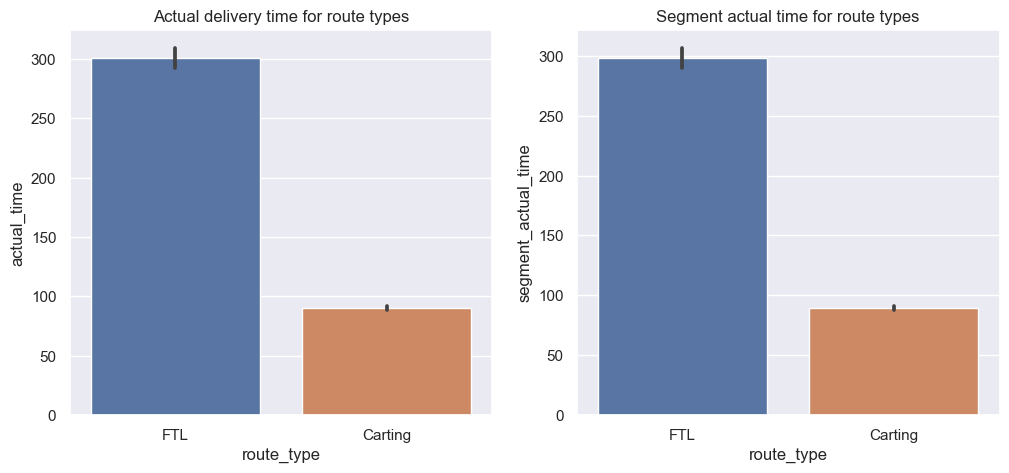

In [250]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Actual delivery time for route types')
sns.barplot(y='actual_time',x='route_type',data=df_merge)

plt.subplot(1,2,2)
plt.title('Segment actual time for route types')
sns.barplot(y='segment_actual_time',x='route_type',data=df_merge)

plt.show()

We can confirm thru hypothesis testing and visual analysis that there is no difference in the mean values of actual time and segment actual time

In [251]:
# We will use kruskal test to compare the difference of osrm distance with segmentosrm distance

stat,p_value=(kruskal(df_merge['osrm_distance'],df_merge['segment_osrm_distance']))
if p_value < 0.05:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is a difference between the mean values for osrm distance and segment osrm distance')
else:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is no difference between the mean values for osrm distance and segment osrm distance')

p-value for kruskal test is 0.0 and therefore, there is a difference between the mean values for osrm distance and segment osrm distance


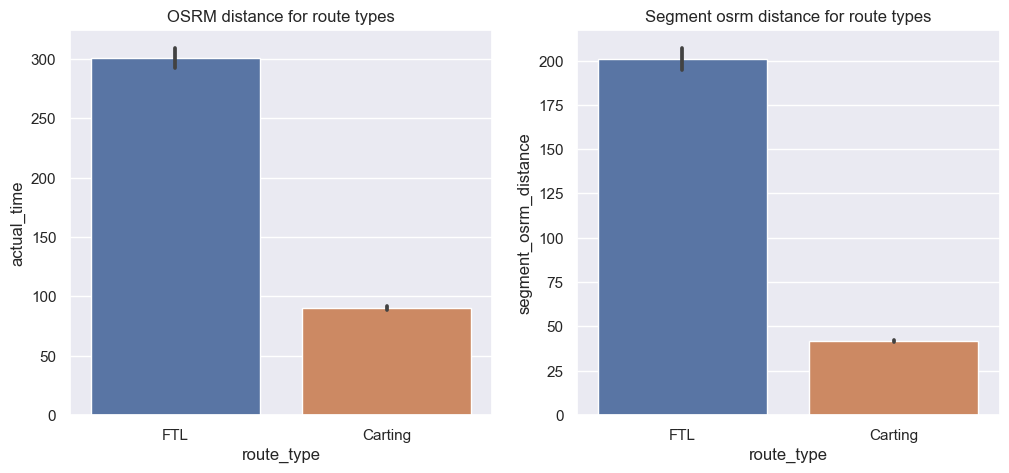

In [254]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('OSRM distance for route types')
sns.barplot(y='actual_time',x='route_type',data=df_merge)

plt.subplot(1,2,2)
plt.title('Segment osrm distance for route types')
sns.barplot(y='segment_osrm_distance',x='route_type',data=df_merge)

plt.show()

We can confirm thru hypothesis testing and visual analysis that there is difference in the mean values of OSRM distance and segment osrm distance

In [255]:
# We will use kruskal test to compare the difference of osrm time with segment osrm time

stat,p_value=(kruskal(df_merge['osrm_time'],df_merge['segment_osrm_time']))
if p_value < 0.05:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is a difference between the mean values for osrm time and segment osrm time')
else:
    print(f'p-value for kruskal test is {round(p_value,2)} and therefore, there is no difference between the mean values for osrm time and segment osrm time')

p-value for kruskal test is 0.0 and therefore, there is a difference between the mean values for osrm time and segment osrm time


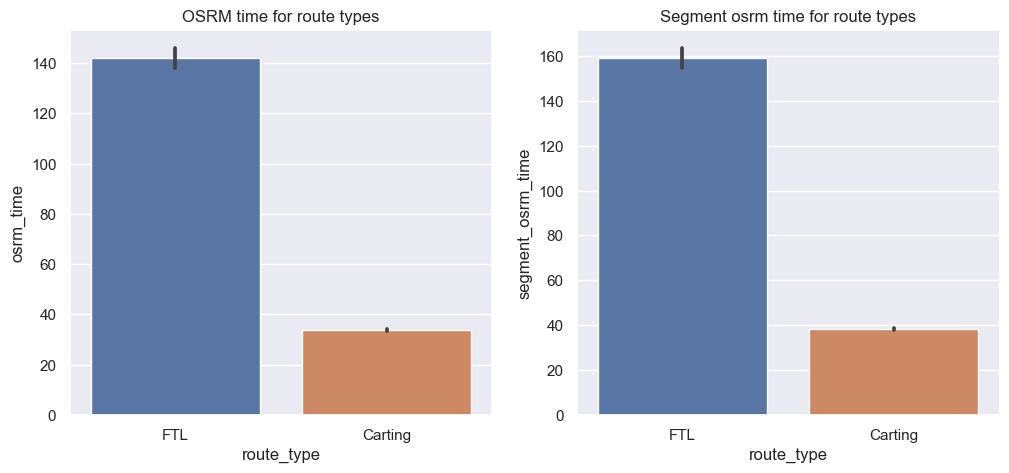

In [256]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('OSRM time for route types')
sns.barplot(y='osrm_time',x='route_type',data=df_merge)

plt.subplot(1,2,2)
plt.title('Segment osrm time for route types')
sns.barplot(y='segment_osrm_time',x='route_type',data=df_merge)

plt.show()

We can confirm thru hypothesis testing and visual analysis that there is difference in the mean values of OSRM time and segment osrm time

# 4. Visual Analysis

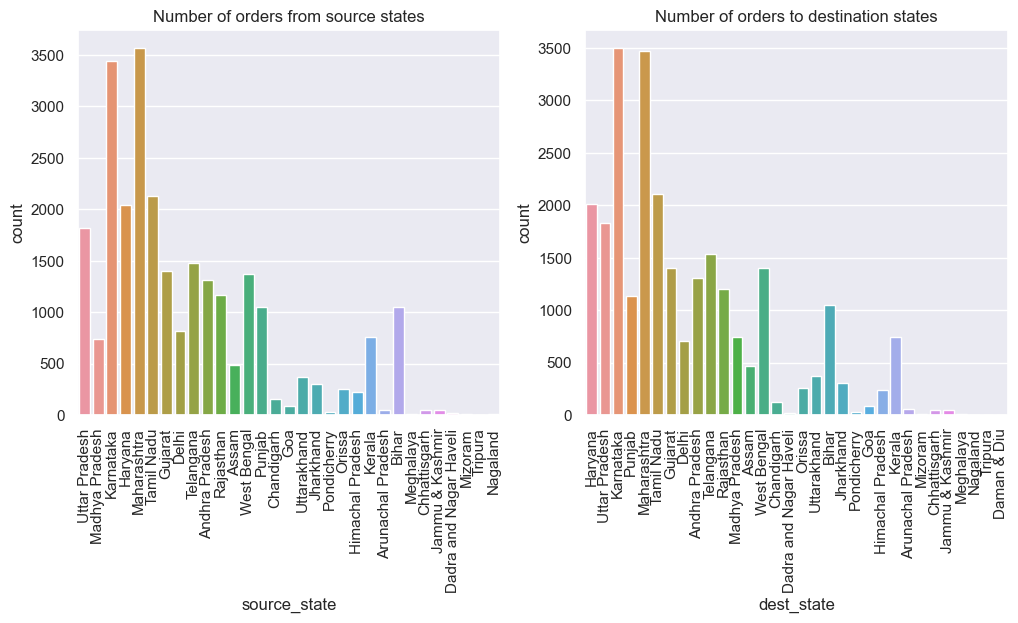

In [278]:
# Count of trips from source states and destination states by using countplot

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Number of orders from source states')
plt.xticks(rotation=90)
sns.countplot(x='source_state',data=df_merge)

plt.subplot(1,2,2)
plt.title('Number of orders to destination states')
plt.xticks(rotation=90)
sns.countplot(x='dest_state',data=df_merge)

plt.show()

- Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh are the most busy states for the origin and destination of couriers
- Order count of couriers to and from North Eastern States and Union Territories (Pondicherry, Chandigarh etc.) is low

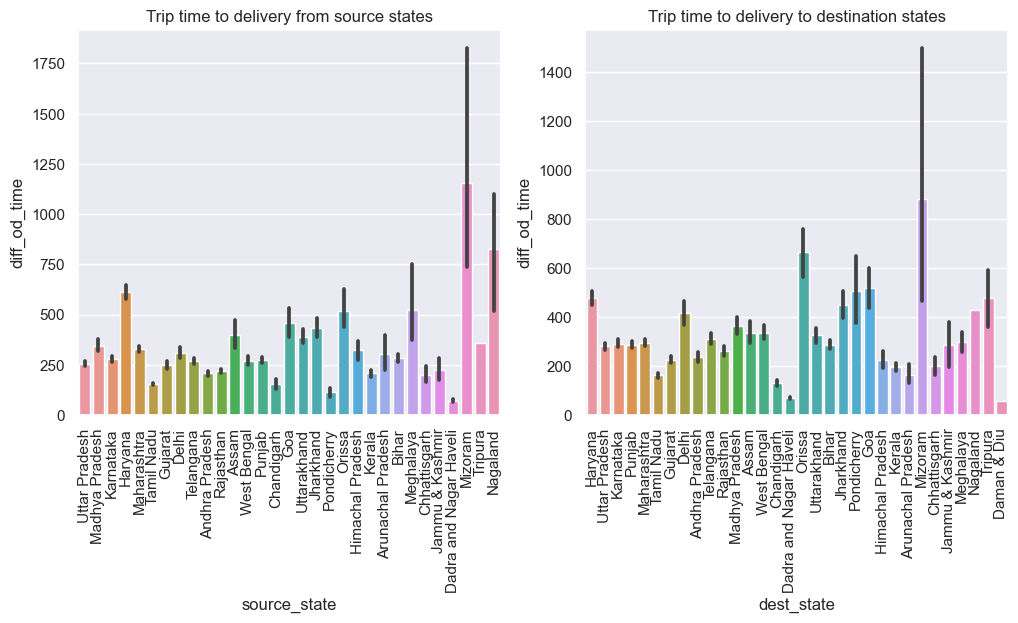

In [281]:
# Plot mean trip time for all source states and destination states

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Trip time to delivery from source states')
sns.barplot(x='source_state',y='diff_od_time',data=df_merge)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Trip time to delivery to destination states')
sns.barplot(x='dest_state',y='diff_od_time',data=df_merge)
plt.xticks(rotation=90)

plt.show()

- Couriers bound to and fro for North Eastern states are taking longer time
- To be observed, couriers bound to Haryana and Orissa are also taking longer time as compared to others

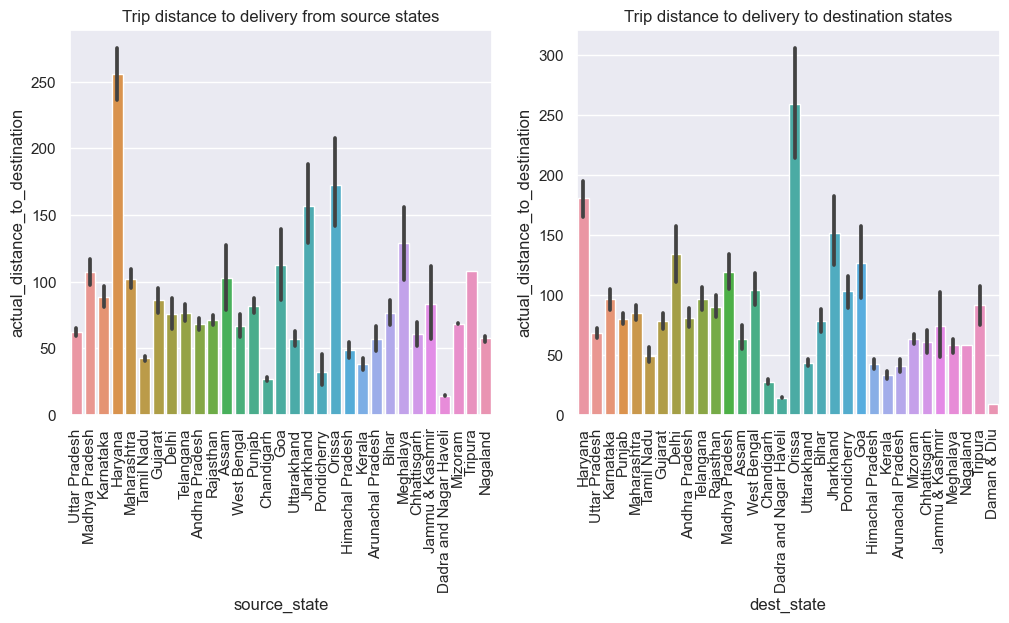

In [329]:
# Plot actual distance to destination for source states and origin states

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Trip distance to delivery from source states')
sns.barplot(x='source_state',y='actual_distance_to_destination',data=df_merge)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Trip distance to delivery to destination states')
sns.barplot(x='dest_state',y='actual_distance_to_destination',data=df_merge)
plt.xticks(rotation=90)

plt.show()

- Couriers from Haryana and Orissa are delivered to states which are far compared to others. This explains why trip time for these states was also higher compared to others

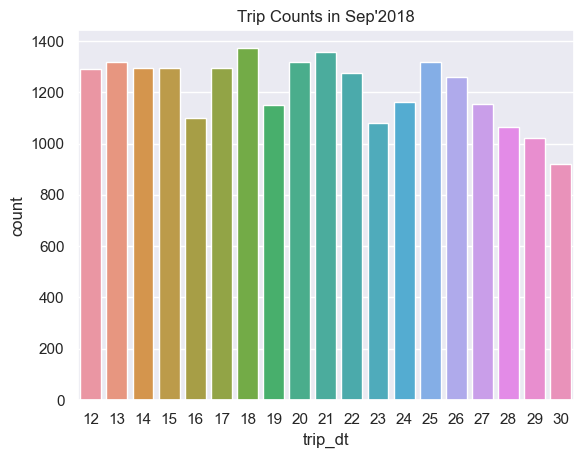

In [289]:
# Check the count of trips created on a particular date in September

plt.title("Trip Counts in Sep'2018")
sns.countplot(x=df_merge[df_merge['trip_mth']=='Sep']['trip_dt'],data=df_merge)
plt.show()

We have the data beginning from Sep 12th to October 3rd, 2018. For this visual plot, we have just taklen the data for september.
Trips are created almost the same on each day and dont see much variance apart from Sundays. On 16th, 23rd and 30th, we see a slight dip in the trip counts which might be due to a holiday.

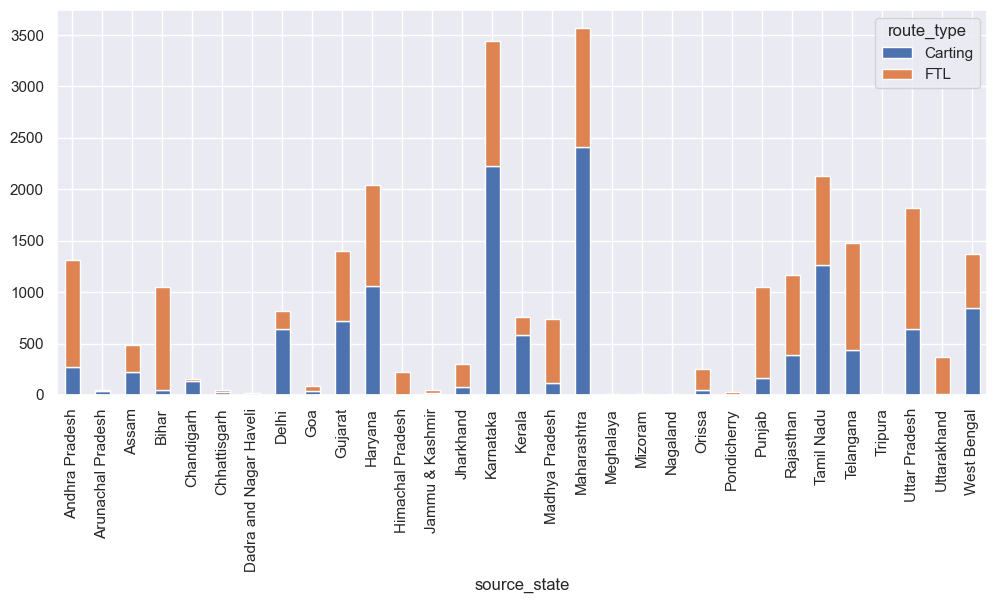

In [523]:
# Plot bar chart to compare the counts of routing type for source states

df_merge.groupby(['source_state','route_type']).size().unstack().plot(kind='bar',stacked=True,figsize=(12,5))
plt.show()

We can observe that FTL is preferred than Carting. But, looking at the busiest states, we see that Carting is more preferred (E.g. Karnataka, Maharashtra, Tamil Nadu etc.)

# Analysis on top 5 states with most courier count

In [427]:
# Extract the top 5 states which have the highest number of trips

top_states=df_merge['source_state'].value_counts(ascending=False).index[:5]
top_states

Index(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Haryana', 'Uttar Pradesh'], dtype='object')

In [429]:
# Extract the rows from main dataset for the top 5 states

df_top_states=df_merge.loc[df_merge['source_state'].isin(top_states)]
df_top_states.head()

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
0,training,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,...,1260.0,383.759164,732.0,728.0,329.0,534.0,446.5496,670.6205,403.0,62.790436
2,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,...,58.0,24.644021,47.0,46.0,26.0,26.0,28.1994,28.1995,21.0,3.555379
3,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,...,122.0,48.542890,96.0,95.0,42.0,39.0,56.9116,55.9899,54.0,8.368710
4,training,2018-09-12 00:00:33.691250,Sep,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,...,834.0,237.439610,611.0,608.0,212.0,231.0,281.2109,317.7408,399.0,43.771290
5,training,2018-09-12 00:00:33.691250,Sep,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Bangalore_Nelmngla_H,Karnataka,Gurgaon_Bilaspur_HB,...,3099.0,1689.964663,2736.0,2700.0,1528.0,1710.0,2072.8556,2227.5270,1208.0,382.890937


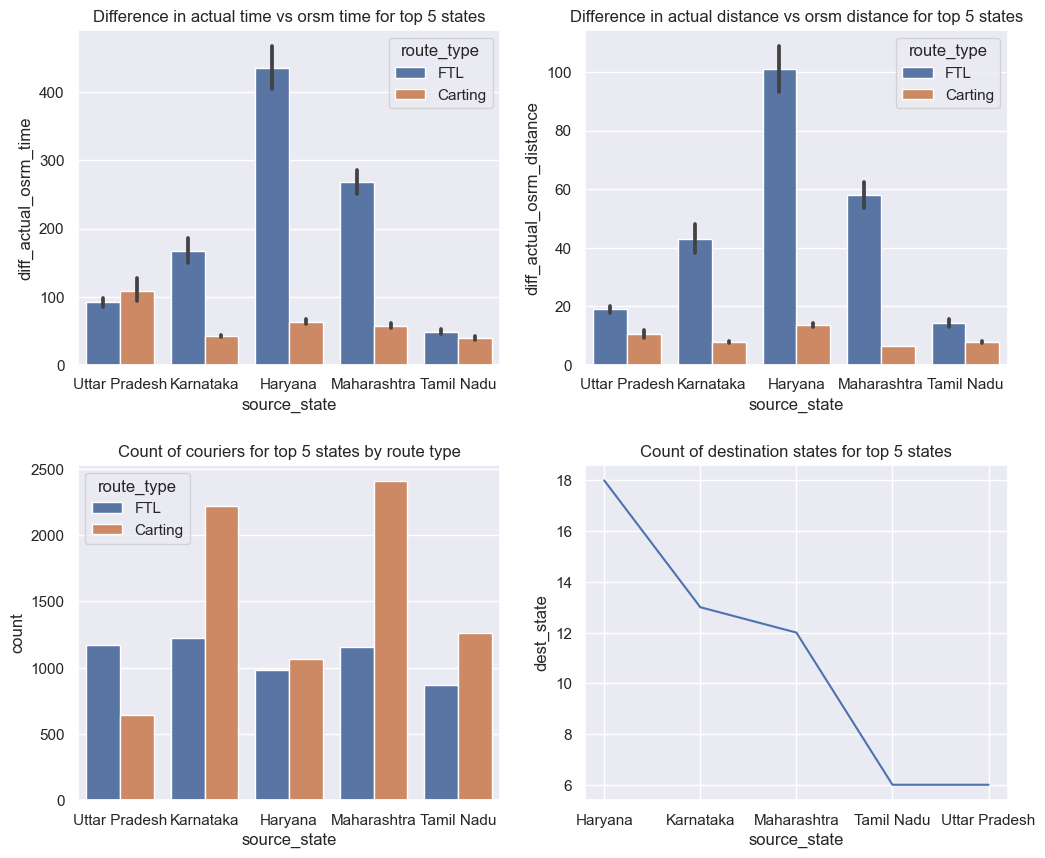

In [475]:
# Barplot to capture the mean difference in actual time vs orsm time and actual distance vs orsm distance for top 5 states

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title('Difference in actual time vs orsm time for top 5 states')
sns.barplot(data=df_top_states,x='source_state',y='diff_actual_osrm_time',hue='route_type')

plt.subplot(2,2,2)
plt.title('Difference in actual distance vs orsm distance for top 5 states')
sns.barplot(data=df_top_states,x='source_state',y='diff_actual_osrm_distance',hue='route_type')

plt.subplot(2,2,3)
plt.title('Count of couriers for top 5 states by route type')
sns.countplot(data=df_top_states,x='source_state',hue='route_type')

df_cnt=df_top_states.groupby(['source_state'])['dest_state'].nunique().reset_index()
plt.subplot(2,2,4)
plt.title('Count of destination states for top 5 states')
sns.lineplot(x='source_state',y='dest_state',data = df_cnt)

plt.subplots_adjust(hspace=0.3)
plt.show()

- We can observe that Haryana has maximum difference for actual time/ distance with orsm time/ distance.
- Uttar Pradesh and Tamil Nadu have lower difference compared to the top peers.
- All the other states apart from Uttar Pradesh have more couriers for Carting route type. Most of the couriers from Uttar Pradesh are of Full Truck Load.
- Haryana leads the way in sending courier to maximum number of states (18) followed by Karnataka (13) and Maharashtra (12).

# 5. Insights from Data using aggregation

In [527]:
# Compute the average difference in actual time vs osrm time for different route types

avg_time_diff_cart=df_merge[df_merge['route_type']=='Carting']['diff_actual_osrm_time'].mean()
avg_time_diff_ftl=df_merge[df_merge['route_type']=='FTL']['diff_actual_osrm_time'].mean()
print(f'The mean difference of actual time and osrm time for Carting is {round(avg_time_diff_cart,2)} and for FTL is {round(avg_time_diff_ftl,2)}')

The mean difference of actual time and osrm time for Carting is 56.43 and for FTL is 159.2


In [530]:
# Compute the average actual distance to destination for different route types

avg_actual_dist_cart=df_merge[df_merge['route_type']=='Carting']['actual_distance_to_destination'].mean()
avg_actual_dist_ftl=df_merge[df_merge['route_type']=='FTL']['actual_distance_to_destination'].mean()
print(f'The mean trip distance for Carting is {round(avg_actual_dist_cart,2)} and for FTL is {round(avg_actual_dist_ftl,2)}')

The mean trip distance for Carting is 28.89 and for FTL is 149.84


In [324]:
# Use aggregation to find the source states with number of cities as origin

df_merge.groupby(['source_state'])['source_city'].nunique().reset_index().sort_values('source_city',ascending=False).reset_index(drop=True)

,source_state,source_city
0,Uttar Pradesh,146
1,Maharashtra,135
2,Tamil Nadu,132
3,Karnataka,126
4,West Bengal,103
5,Rajasthan,98
6,Telangana,84
7,Gujarat,81
8,Andhra Pradesh,78
9,Madhya Pradesh,65


- Uttar Pradesh followed by Maharashtra and Tamil Nadu have the maximum number of cities as source
- North Eastern states, UTs are in the bottom

In [325]:
# Use aggregation to find the destination states with number of cities as destination

df_merge.groupby(['dest_state'])['dest_city'].nunique().reset_index().sort_values('dest_city',ascending=False).reset_index(drop=True)

,dest_state,dest_city
0,Uttar Pradesh,144
1,Maharashtra,135
2,Tamil Nadu,125
3,Karnataka,125
4,West Bengal,104
5,Rajasthan,100
6,Gujarat,79
7,Telangana,78
8,Andhra Pradesh,76
9,Madhya Pradesh,67


- Same trend as in source is observed for the detsination states

In [387]:
# Extract the busiest cities across each state

df_grp1=df_merge.groupby(['source_state','source_city'])['data'].count().reset_index()
idxmax=df_grp1.groupby('source_state')['data'].idxmax()
res=df_grp1.loc[idxmax,['source_state','source_city','data']]
res.sort_values('data',ascending=False)

,source_state,source_city,data
343,Haryana,Gurgaon_Bilaspur_HB,1052
693,Maharashtra,Bhiwandi_Mankoli_HB,821
433,Karnataka,Bangalore_Nelmngla_H,768
870,Punjab,Chandigarh_Mehmdpur_H,370
1167,Telangana,Hyderabad_Shamshbd_H,329
1070,Tamil Nadu,MAA_Poonamallee_HB,300
248,Gujarat,Ahmedabad_East_H_1,280
1455,West Bengal,Kolkata_Dankuni_HB,262
216,Delhi,Delhi_Airport_H,253
1304,Uttar Pradesh,Kanpur_Central_H_6,220


From the above table we have found the busiest cities (city with maximum number of trips) in each state. E.g. Gurgaon_Bilaspur_HB is the busiest station in Haryana and India followed by Bhiwandi_Mankoli_HB is the busiest city in Maharashtra.

In [394]:
# Identify Busiest Routes

df_grp2=df_merge.groupby(['source_city','dest_city'])['data'].count().reset_index()
idxmax=df_grp2.groupby(['source_city','dest_city'])['data'].idxmax()
res=df_grp2.loc[idxmax,['source_city','dest_city','data']]
res.sort_values('data',ascending=False).head(20)

,source_city,dest_city,data
212,Bangalore_Nelmngla_H,Bengaluru_KGAirprt_HB,151
210,Bangalore_Nelmngla_H,Bengaluru_Bomsndra_HB,127
303,Bengaluru_Bomsndra_HB,Bengaluru_KGAirprt_HB,121
317,Bengaluru_KGAirprt_HB,Bangalore_Nelmngla_H,108
2162,Pune_Tathawde_H,Bhiwandi_Mankoli_HB,107
401,Bhiwandi_Mankoli_HB,Mumbai Hub,105
298,Bengaluru_Bomsndra_HB,Bangalore_Nelmngla_H,102
739,Delhi_Gateway_HB,Gurgaon_Bilaspur_HB,100
1843,Mumbai_Chndivli_PC,Bhiwandi_Mankoli_HB,99
1050,Gurgaon_Bilaspur_HB,Sonipat_Kundli_H,92


From the above table, we see that Bangalore_Nelmngla_H to Bengaluru_KGAirprt_HB is the busiest route with 151 unique trips

In [411]:
# Insights of the busiest route

df_busy_route = df_merge[(df_merge['source_city']=='Bangalore_Nelmngla_H ') & (df_merge['dest_city']=='Bengaluru_KGAirprt_HB ')]
avg_trip_time=df_busy_route['diff_od_time'].mean()
avg_trip_distance=df_busy_route['actual_distance_to_destination'].mean()
avg_actual_time=df_busy_route['actual_time'].mean()
avg_osrm_time=df_busy_route['osrm_time'].mean()
avg_seg_osrm_time=df_busy_route['segment_osrm_time'].mean()
avg_osrm_dist=df_busy_route['osrm_distance'].mean()
avg_seg_osrm_dist=df_busy_route['segment_osrm_distance'].mean()
print(f'The average difference between trip start time and trip end time is {(round(diff_trip_time,2))} minutes.')
print(f'The average trip distance between source and destination is  {(round(avg_trip_distance,2))} kms.')
print(f'The average actual time between source and destination is {(round(avg_actual_time,2))} minutes.')
print(f'The average osrm time between source and destination is {(round(avg_osrm_time,2))} minutes.')
print(f'The average segment osrm time between source and destination is {(round(avg_seg_osrm_time,2))} minutes.')
print(f'The average osrm distance between source and destination is {(round(avg_osrm_dist,2))} kms.')
print(f'The average segment osrm distance between source and destination is {(round(avg_seg_osrm_dist,2))} kms.')

The average difference between trip start time and trip end time is 183.56 minutes.
The average trip distance between source and destination is  28.02 kms.
The average actual time between source and destination is 87.87 minutes.
The average osrm time between source and destination is 48.05 minutes.
The average segment osrm time between source and destination is 51.25 minutes.
The average osrm distance between source and destination is 38.08 kms.
The average segment osrm distance between source and destination is 45.3 kms.


In [483]:
# Find the route which has highest difference in actual time and osrm time

df_merge.loc[df_merge['diff_actual_osrm_time']==df_merge['diff_actual_osrm_time'].max()]

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
9420,training,2018-09-19 13:44:58.665210,Sep,19,thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...,FTL,trip-153736469866480991,Gurgaon_Bilaspur_HB,Haryana,Kolkata_Dankuni_HB,...,4239.0,1300.480089,4152.0,4129.0,1015.0,1123.0,1427.0313,1611.5351,3137.0,126.551211


We have a route from Gurgaon (Haryana) to Kolkata Dankuni (WB) where the difference between actual time and osrm time is 3137 minutes (2 days).

In [484]:
# Find the route which has highest difference in actual distance covered vs osrm distance

df_merge.loc[df_merge['diff_actual_osrm_distance']==df_merge['diff_actual_osrm_distance'].max()]

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
4337,training,2018-09-15 06:03:01.496238,Sep,15,thanos::sroute:6be6529b-f2ad-4714-b7ab-ac58f24...,FTL,trip-153699138149593590,Gurgaon_Bilaspur_HB,Haryana,MAA_Poonamallee_HB,...,3134.0,1721.526634,2891.0,2857.0,1611.0,1788.0,2190.9852,2372.5527,1280.0,469.458566


We have a route from Gurgaon_Bilaspur (Haryana) to MAA_Poonamallee_HB (Tamil Nadu) where the difference between actual distance and osrm distance is 469 kilometres.

In [485]:
# Find the route which takes most time

df_merge.loc[df_merge['actual_time']==df_merge['actual_time'].max()]

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
7962,training,2018-09-18 04:59:16.125309,Sep,18,thanos::sroute:6be6529b-f2ad-4714-b7ab-ac58f24...,FTL,trip-153724675612503042,Gurgaon_Bilaspur_HB,Haryana,MAA_Poonamallee_HB,...,4535.0,1721.601595,4532.0,4504.0,1610.0,1667.0,2190.6314,2323.3326,2922.0,469.029805


We have a route from Gurgaon_Bilaspur (Haryana) to MAA_Poonamallee_HB (Tamil Nadu) for trip# trip-153724675612503042 where it took the 4532 minutes to deliver.

In [486]:
# Find the longest route

df_merge.loc[df_merge['actual_distance_to_destination']==df_merge['actual_distance_to_destination'].max()]

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
12201,training,2018-09-21 18:37:09.322207,Sep,21,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,Chandigarh_Mehmdpur_H,Punjab,Bangalore_Nelmngla_H,...,3802.0,1927.447705,3784.0,3751.0,1686.0,1864.0,2326.1991,2500.2145,2098.0,398.751395


We have a route from Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka) for trip# trip-153755502932196495 which is 1927 kms long.

# 6. One hot encoding of categorical variables

In [492]:
df_encoded=df_merge.copy()

In [493]:
df_encoded = pd.get_dummies(df_encoded, columns=['route_type','data'], prefix='enc')

In [494]:
df_encoded.head()

,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,trip_uuid,source_city,source_state,dest_city,dest_state,diff_od_time,...,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance,enc_Carting,enc_FTL,enc_test,enc_training
0,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,1261.0,...,329.0,534.0,446.5496,670.6205,403.0,62.790436,0,1,0,1
1,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H,Madhya Pradesh,Kanpur_Central_H_6,Uttar Pradesh,1000.0,...,388.0,474.0,544.8027,649.8528,442.0,103.829011,0,1,0,1
2,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,59.0,...,26.0,26.0,28.1994,28.1995,21.0,3.555379,1,0,0,1
3,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Karnataka,123.0,...,42.0,39.0,56.9116,55.9899,54.0,8.368710,1,0,0,1
4,2018-09-12 00:00:33.691250,Sep,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,835.0,...,212.0,231.0,281.2109,317.7408,399.0,43.771290,0,1,0,1


- We have encoded the categorical fields of route_type which has created 2 new columns i.e. enc_Carting and enc_FTL with values 0 and 1
- Same exercise has been done for data variable which has created 2 variables i.e. enc_test and enc_training

# 7. Normalization of numeric fields

In [496]:
df_normalized = df_merge.copy()

In [499]:
numeric_cols=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','segment_actual_time','osrm_time','segment_osrm_time','osrm_distance','segment_osrm_distance']
df_normalized[numeric_cols]=df[numeric_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_normalized.info()

In [505]:
df_normalized.head()

,data,trip_creation_time,trip_mth,trip_dt,route_schedule_uuid,route_type,trip_uuid,source_city,source_state,dest_city,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,diff_actual_osrm_time,diff_actual_osrm_distance
0,training,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,...,0.008378,0.000748,0.001105,0.004589,0.002976,0.006828,0.001276,0.005460,403.0,62.790436
1,training,2018-09-12 00:00:16.535741,Sep,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H,Madhya Pradesh,Kanpur_Central_H_6,...,0.008378,0.005180,0.003316,0.003278,0.008333,0.005587,0.005488,0.004453,442.0,103.829011
2,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,...,0.008378,0.009715,0.006854,0.005244,0.013095,0.004345,0.010155,0.004935,21.0,3.555379
3,training,2018-09-12 00:00:22.886430,Sep,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,...,0.008378,0.014135,0.011718,0.006883,0.020238,0.007449,0.015775,0.005942,54.0,8.368710
4,training,2018-09-12 00:00:33.691250,Sep,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,...,0.008378,0.015839,0.013044,0.001967,0.022619,0.003104,0.019511,0.001787,399.0,43.771290


 We have extracted all the numeric columns from dataset and applied the Min-Max Normalization to standardize the values

# 8. Business Insights

- We have data starting from September 12th, 2018 to October 3rd, 2018 in the dataset covering ~15000 trips. Trip count for each day of the week is almost same except Sundays. Count is lower on Sunday due to holiday.
- There are ~1500 storehouses located in 31 Indian states and Union territories 
- Average trip time and average distance from source to destination is 5 hours and 92 kms respectively.
- Full Trucks Load trips are slightly more than carting. Carting route type is more efficient that FTL as the difference between actual time to delivery and osrm time is low.
- There is big gap (mean of 100 minutes) between actual time taken to complete the trip vs osrm time (time taken if shortest path is considered).
- Maharashtra, Karnataka, Tamil Nadu, Haryana and Uttar Pradesh are the busiest states accounting for 50% of the total trips while North Eastern states and Union territories are at the bottom of table.
- Trips to North Eastern states are taking maximum time though the distance between source and destination is medium as compared to other routes. The difference in actual time and orsm time is way above the average.
- Trips to and fro from Haryana and Orissa are also taking longer time as compared to other states and this is due to the trips from and to Haryana & Orissa have cover maximum distances.
- Difference in actual trip time and osrm time is very high for Haryana and Maharashtra especially with FTL.
- For top 5 busiest states, carting is more preferred than FTL apart from Uttar Pradesh where it is the opposite.
- The mean difference between actual time and osrm time is way lesser for Carting (1 hour) than FTL (2.5 hrs) which can be due to FTL cover more distance than carting.
- Couriers from Haryana are delivered to 18 different states followed by Karnataka (13) and Maharashtra (12).
- Uttar Pradesh has the maximum number of source & destination stations (146 & 144) followed by Maharashtra (135 & 135) and Tamil Nadu (132 & 132).
- Gurgaon_Bilaspur in Haryana is the busiest source station with 1052 trips followed by Bhiwandi_Mankoli (Maharashtra) with 821 trips and Bangalore_Nelmngla (Karnataka) with 768 trips.
- Top 3 busiest corridors are in Karanataka. Bangalore_Nelmngla to Bengaluru_KGAirprt is the busiest corridor with 151 trips.

# 9. Recommendations

- There is big gap between actual trip time and osrm time (shortest time) especially with FTL. Provide awareness about using online maps which can help reducing the actual trip time.
- Enhance the transportation system to North Eastern states
- Difference between actual trip time and osrm time for Carting is way lower than FTL. We can try to use Carting more in states where actual time is high.
- Decongest and reduce the burden on same stations like Gurgaon_Bilaspur (Haryana) on neighboring stations or states.